In [12]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

In [13]:
url='https://raw.githubusercontent.com/engrsaifulphd/engrsaifulphd/master/forestfires.csv'
df = pd.read_csv(url)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.isnull().values.any()
df.isnull().values.sum()
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [6]:
features=['rain','RH','temp','wind'] 
X=df[features]

y=df['FFMC']

In [4]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [7]:
svm_ml = svm.SVR(kernel='linear').fit(X_train, y_train)

In [8]:
cv_svm = cross_validate(svm_ml, X, y, cv=10)
print(cv_svm['test_score'])
print(cv_svm['test_score'].mean())

[0.01545482 0.15901389 0.11562538 0.11748096 0.11597457 0.18192704
 0.03564037 0.10805086 0.37346557 0.12779534]
0.13504288126728206


In [9]:
score_df_svm=pd.DataFrame(cv_svm)
score_df_svm

,fit_time,score_time,test_score
0,0.198143,0.001785,0.015455
1,0.202978,0.001695,0.159014
2,0.281858,0.001686,0.115625
3,0.211965,0.001928,0.117481
4,0.265879,0.001700,0.115975
5,0.208331,0.001638,0.181927
6,0.231804,0.001632,0.035640
7,0.216403,0.001656,0.108051
8,0.222767,0.001769,0.373466
9,0.260095,0.001634,0.127795


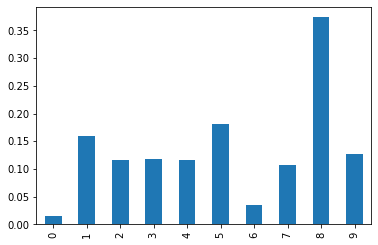

In [10]:
ax = score_df_svm.test_score.plot.bar()

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: ignored

In [ ]:
cv_logit = cross_validate(logreg, X, y, cv=10)
print(cv_logit['test_score'])
print(cv_logit['test_score'].mean())

[nan nan nan nan nan nan nan nan nan nan]
nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition f